TAREA 1: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas).

In [1]:
# Importamos los módulos necesarios
import cv2
import numpy as np
import matplotlib.pyplot as plt

(0.0, 512.0)

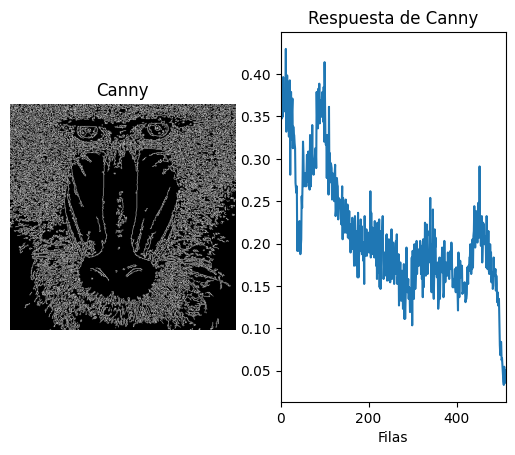

In [27]:
# Leemos la imagen del archivo
mandril = cv2.imread('mandril.jpg')

# Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(mandril, cv2.COLOR_BGR2GRAY)

# Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

# El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
# Cuenta el número de píxeles blancos (255) por filas
# Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts / (255 * canny.shape[0])


#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA 1.1: Determinar el máximo para filas y columnas (uno para cada).

In [23]:
# Determinamos la fila con el valor máximo de píxeles blancos
max_rows = np.argmax(rows)
print("El máximo de la respuesta de Canny es: ", max_rows)

# Determinar el número de píxeles blancos en la fila con el valor máximo
max_value_row = row_counts[max_rows]
print("El número de píxeles blancos en la fila con el valor máximo es: ", max_value_row)

El máximo de la respuesta de Canny es:  12
El número de píxeles blancos en la fila con el valor máximo es:  [56100]


In [24]:
# Sumar los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalizar en base al número de filas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

# Determinar la columna con el valor máximo de píxeles blancos
max_cols = np.argmax(col_counts)
print("La columna con el valor máximo de píxeles blancos es: ", max_cols)

# Determinar el número de píxeles blancos en la columna con el valor máximo
max_value_col = col_counts[0][max_cols]
print("El número de píxeles blancos en la columna con el valor máximo es: ", max_value_col)

La columna con el valor máximo de píxeles blancos es:  104
El número de píxeles blancos en la columna con el valor máximo es:  47685


TAREA 1.2: Muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

In [25]:
# Mostramos el número de filas con un número de píxeles blancos superior al 95% del máximo
print("Número de filas con un número de píxeles blancos superior al 95% del máximo: ", np.sum(row_counts > max_value_row * 0.95))

# Averiguamos las filas exactas tienen un número de píxeles blancos superior al 95% del máximo
rows_95 = np.where(row_counts > max_value_row * 0.95)
print("Filas con un número de píxeles blancos superior al 95% del máximo: ", rows_95[0])

# Mostramos el número de píxeles blanco de dichas filas
print("Número de píxeles blanco de dichas filas: ", row_counts[rows_95])

Número de filas con un número de píxeles blancos superior al 95% del máximo:  2
Filas con un número de píxeles blancos superior al 95% del máximo:  [ 12 100]
Número de píxeles blanco de dichas filas:  [56100 54060]


TAREA 2: Aplicar umbralizado a la imagen resultante de Sobel y realizar el conteo por filas y columnas.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

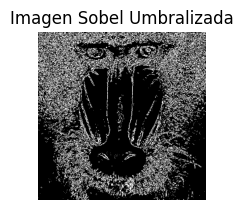

In [26]:

# Aplicar el operador de Sobel a la imagen en niveles de grises
sobel_x = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=3) # Sobel en dirección x
sobel_y = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=3) # Sobel en dirección y

# Calcular la magnitud y la dirección de los gradientes
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# Convertir la magnitud a un rango de 0 a 255 (8 bits)
sobel8 = np.uint8(sobel)

# Aplicar el umbral para binarizar la imagen
_, sobel_bin = cv2.threshold(sobel8, 127, 255, cv2.THRESH_BINARY)

# Contar los píxeles blancos por filas y columnas
row_counts_sobel = np.sum(sobel_bin==255, axis=1)
#print(row_counts_sobel)
col_counts_sobel = np.sum(sobel_bin==255, axis=0)
#print(col_counts_sobel)

# Mostrar la imagen binarizada
plt.subplot(2, 2, 1)
plt.imshow(sobel_bin, cmap='gray')
plt.title('Imagen Sobel Umbralizada')
plt.axis('off')

TAREA 2.1: Calcular los máximos por filas y columnas, y determinar las filas y columnas por encima del 0.95*máximo. Remarcar con alguna primitiva gráfica dichas filas y columnas sobre la imagen.

Filas con un número de píxeles blancos superior al 95% del máximo:  [  3   6  12  15  24  25 100]
Columnas con un número de píxeles blancos superior al 95% del máximo:  [ 97 100 104 106 108 119 127 128 132]


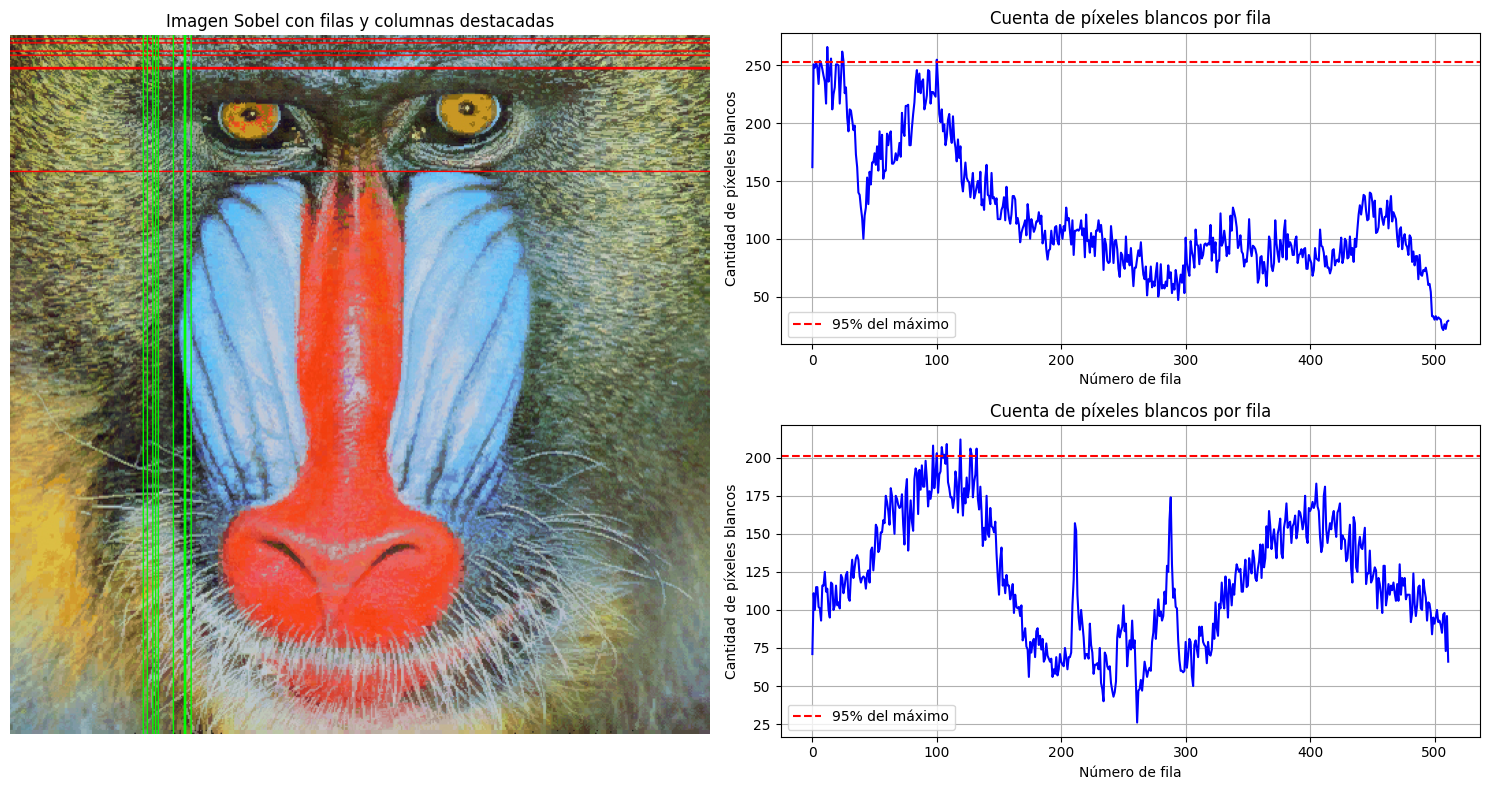

In [21]:
# Determinar las filas y columnas que están por encima del 95% del máximo.
rows_95_sobel = np.where(row_counts_sobel > np.max(row_counts_sobel) * 0.95)
print("Filas con un número de píxeles blancos superior al 95% del máximo: ", rows_95_sobel[0])
cols_95_sobel = np.where(col_counts_sobel > np.max(col_counts_sobel) * 0.95)
print("Columnas con un número de píxeles blancos superior al 95% del máximo: ", cols_95_sobel[0])

# Crear una copia de la imagen original para remarcar las filas y columnas
mandril_copy = mandril.copy()
# Convertir la imagen a RGB
mandril_copy = cv2.cvtColor(mandril_copy, cv2.COLOR_BGR2RGB)

# Remarcar las filas que están por encima del 95% del máximo
for row in rows_95_sobel[0]:
    mandril_copy[row, :, :] = [255, 0, 0] # Rojo    

# Remarcar las columnas que están por encima del 95% del máximo
for col in cols_95_sobel[0]:
    mandril_copy[:, col, :] = [0, 255, 0] # Verde

# Visualizar la imagen marcada junto con los gráficos de conteos
plt.figure(figsize=(15, 8))

# Mostrar la imagen con las filas y columnas marcadas
plt.subplot(1, 2, 1)
plt.imshow(mandril_copy)
plt.title('Imagen Sobel con filas y columnas destacadas')
plt.axis('off')

# Mostrar el gráfico de la cantidad de píxeles blancos por filas
plt.subplot(2, 2, 2)
plt.plot(row_counts_sobel, color='blue')
plt.axhline(y=np.max(row_counts_sobel) * 0.95, color='r', linestyle='--', label='95% del máximo')
plt.title('Cuenta de píxeles blancos por fila')
plt.xlabel('Número de fila')
plt.ylabel('Cantidad de píxeles blancos')
plt.grid(True)
plt.legend()

# Mostrar el gráfico de la cantidad de píxeles blancos por columnas
plt.subplot(2, 2, 4)
plt.plot(col_counts_sobel, color='blue')
plt.axhline(y=np.max(col_counts_sobel) * 0.95, color='r', linestyle='--', label='95% del máximo')
plt.title('Cuenta de píxeles blancos por fila')
plt.xlabel('Número de fila')
plt.ylabel('Cantidad de píxeles blancos')
plt.grid(True)
plt.legend()

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

TAREA 2.2: ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

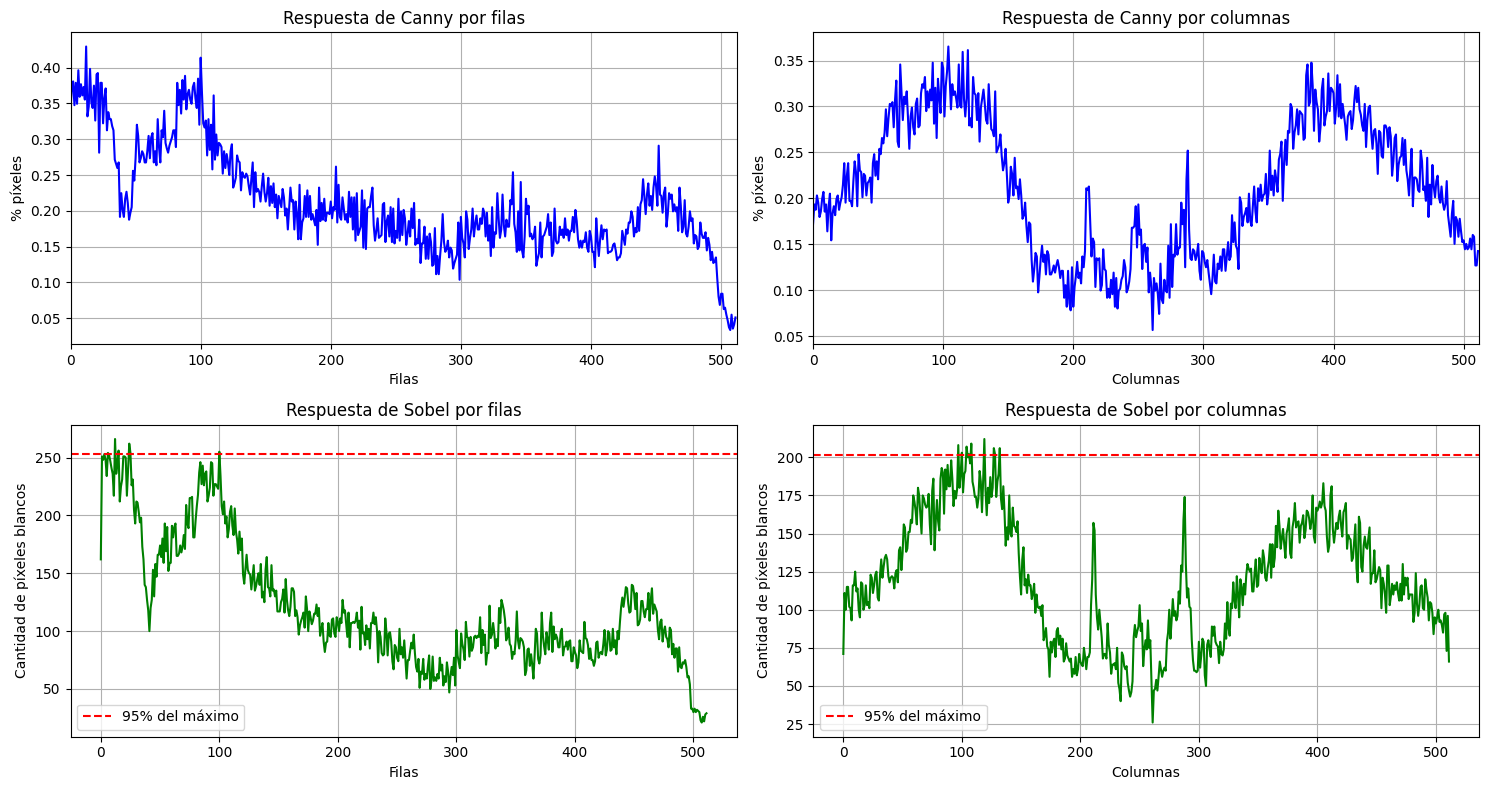

In [32]:
# Comparación de los gráficos de Canny y Sobel

plt.figure(figsize=(15, 8))

# Gráfico de Canny por filas
plt.subplot(2, 2, 1)
plt.title("Respuesta de Canny por filas")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows, color='blue')
plt.xlim([0, len(rows)])
plt.grid(True)

# Gráfico de Canny por columnas
plt.subplot(2, 2, 2)
plt.title("Respuesta de Canny por columnas")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols, color='blue')
plt.xlim([0, len(cols)])
plt.grid(True)

# Gráfico de Sobel por filas
plt.subplot(2, 2, 3)
plt.plot(row_counts_sobel, color='green')
plt.axhline(y=np.max(row_counts_sobel) * 0.95, color='r', linestyle='--', label='95% del máximo')
plt.title('Respuesta de Sobel por filas')
plt.xlabel('Filas')
plt.ylabel('Cantidad de píxeles blancos')
plt.grid(True)
plt.legend()

# Gráfico de Sobel por columnas
plt.subplot(2, 2, 4)
plt.plot(col_counts_sobel, color='green')
plt.axhline(y=np.max(col_counts_sobel) * 0.95, color='r', linestyle='--', label='95% del máximo')
plt.title('Respuesta de Sobel por columnas')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de píxeles blancos')
plt.grid(True)
plt.legend()

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

# Revisar los comentarios sobre los gráficos en el documento README.md

TAREA 3:Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [3]:
import numpy as np
import cv2
import os

# Inicializar la cámara
vid = cv2.VideoCapture(0)

# Crear el eliminador de fondo
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# Inicializar variables para el modo de diferencia
pframe = None
disponible = 0

# Modos de visualización y sus teclas
modes = {
    'diferencia_fondo': 'd',  
    'diferencia_anterior': 'a',
    'normal': 'n',
    'espejado': 'e',
    'grayscale': 'g',
    'fondo': 'b'
}
current_mode = 'normal'

# Función para guardar una captura de pantalla
def guardar_captura(frame):
    filename = 'captura_diferencia.jpg'
    cv2.imwrite(filename, frame)
    print(f'Captura guardada como {filename}')

# Función para mostrar el menú en el fotograma de video
def mostrar_menu_en_video(frame):
    # Texto del menú
    menu_text = [
        "Menu de modos:",
        "d - Diferencia Fondo",
        "a - Diferencia Anterior",
        "n - Normal",
        "e - Espejado",
        "g - Grayscale",
        "b - Fondo",
        "ESC - Salir"
    ]
    
    # Configuración del texto
    y_offset = 20  # Offset vertical inicial
    for i, line in enumerate(menu_text):
        y = y_offset + i * 20  # Espaciado entre líneas
        cv2.putText(frame, line, (10, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)

while True:
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre el fotograma
        framem = cv2.flip(frame, 1)

        # Aplicar el eliminador de fondo
        objetos = eliminadorFondo.apply(framem)

        # Mostrar el modo correspondiente
        if current_mode == 'fondo':
            background = eliminadorFondo.getBackgroundImage()
            if background is not None:
                frame_mostrar = background
            else:
                frame_mostrar = objetos

        elif current_mode == 'grayscale':
            frame_mostrar = cv2.cvtColor(framem, cv2.COLOR_BGR2GRAY)

        elif current_mode == 'espejado':
            frame_mostrar = framem

        elif current_mode == 'diferencia_fondo':
            frame_mostrar = objetos

        elif current_mode == 'diferencia_anterior':
            if disponible > 0 and pframe is not None:
                dif = cv2.absdiff(frame, pframe) 
                frame_mostrar = dif

                dif_gray = cv2.cvtColor(dif, cv2.COLOR_BGR2GRAY)
                _, thres_dif = cv2.threshold(dif_gray, 50, 255, cv2.THRESH_BINARY)
                
                if np.sum(thres_dif) > 5000000:  # Ajusta este valor según la sensibilidad que desees
                    print("Movimiento detectado: ¡Acción!")
                    guardar_captura(framem)
            else:
                frame_mostrar = frame
                disponible = 1

        elif current_mode == 'normal':
            frame_mostrar = frame

        pframe = frame.copy()

        # Mostrar el menú en el fotograma final que se va a mostrar
        mostrar_menu_en_video(frame_mostrar)

        # Mostrar el fotograma con el menú
        cv2.imshow('Video', frame_mostrar)

    key = cv2.waitKey(20)

    # Cambiar de modo basado en la tecla presionada
    if key == ord('d'):
        current_mode = 'diferencia_fondo'
        print('Modo actual: Diferencia (Eliminador de Fondo)')
    elif key == ord('a'):
        current_mode = 'diferencia_anterior'
        print('Modo actual: Diferencia (Fotograma Anterior)')
    elif key == ord('n'):
        current_mode = 'normal'
        print('Modo actual: Normal')
    elif key == ord('e'):
        current_mode = 'espejado'
        print('Modo actual: Espejado')
    elif key == ord('g'):
        current_mode = 'grayscale'
        print('Modo actual: Escala de grises')
    elif key == ord('b'):
        current_mode = 'fondo'
        print('Modo actual: Fondo')
    elif key == 27:  # ESC para salir
        break

vid.release()
cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np

# Relación de conversión píxeles a centímetros (esto lo ajustas tras calibrar)
PIXELS_TO_CM = 0.1  # Suponiendo que 10 píxeles = 1 cm (esto es solo un ejemplo, necesitas calibrarlo)

# Función para crear barras de control (trackbars) para elegir el color
def crear_selector_color():
    cv2.namedWindow('Selector de Color')
    cv2.createTrackbar('B', 'Selector de Color', 255, 255, lambda x: None)
    cv2.createTrackbar('G', 'Selector de Color', 0, 255, lambda x: None)
    cv2.createTrackbar('R', 'Selector de Color', 0, 255, lambda x: None)

# Función para obtener el color seleccionado en las trackbars
def obtener_color_seleccionado():
    b = cv2.getTrackbarPos('B', 'Selector de Color')
    g = cv2.getTrackbarPos('G', 'Selector de Color')
    r = cv2.getTrackbarPos('R', 'Selector de Color')
    return (b, g, r)  # Devolvemos en formato BGR

# Función para detectar color azul y dibujar líneas entre centros de objetos
def detectar_azul_y_dibujar_rectangulos(frame, color_lineas):
    # Convertir el frame al espacio de color HSV
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Definir el rango de color azul en el espacio HSV
    rango_bajo_azul = np.array([100, 150, 70], np.uint8)  # Rango inferior para azul
    rango_alto_azul = np.array([130, 255, 255], np.uint8)  # Rango superior para azul

    # Crear una máscara que detecte los píxeles dentro del rango del color azul
    mascara = cv2.inRange(frame_hsv, rango_bajo_azul, rango_alto_azul)

    # Encontrar los contornos de las áreas que son azules en el frame
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Lista para almacenar los centros de los rectángulos
    centros = []

    # Dibujar un rectángulo alrededor de cada contorno detectado y almacenar los centros
    for contorno in contornos:
        if cv2.contourArea(contorno) > 500:  # Filtrar contornos pequeños
            # Obtener las coordenadas del rectángulo delimitador
            x, y, ancho, alto = cv2.boundingRect(contorno)
            # Dibujar el rectángulo (color BGR: 0, 165, 255)
            cv2.rectangle(frame, (x, y), (x + ancho, y + alto), (0, 165, 255), 2)

            # Calcular el centro del rectángulo
            centro_x = x + ancho // 2
            centro_y = y + alto // 2
            # Guardar el centro en la lista
            centros.append((centro_x, centro_y))

    # Dibujar líneas que conectan los centros de los rectángulos
    lineas_actuales = []
    for i in range(1, len(centros)):
        # Dibujar una línea entre el centro anterior y el actual
        cv2.line(frame, centros[i - 1], centros[i], color_lineas, 2)
        # Guardar la línea y su color en la lista de líneas actuales
        lineas_actuales.append((centros[i - 1], centros[i], color_lineas))

    return frame, lineas_actuales

# Acceder a la webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error al abrir la webcam")
    exit()

# Lista para almacenar las líneas fijas (coordenadas y color)
lineas_fijas = []

# Crear las barras de control para seleccionar el color
crear_selector_color()

while True:
    # Leer frame de la webcam
    ret, frame = cap.read()
    if not ret:
        print("Error al capturar el frame")
        break

    # Invertir la imagen en el eje horizontal (efecto espejo)
    frame = cv2.flip(frame, 1)

    # Obtener el color seleccionado en las trackbars
    color_lineas = obtener_color_seleccionado()

    # Detectar color azul y dibujar los rectángulos y líneas
    frame_con_lineas, lineas_actuales = detectar_azul_y_dibujar_rectangulos(frame, color_lineas)

    # Dibujar las líneas fijas en cada frame
    for linea in lineas_fijas:
        cv2.line(frame_con_lineas, linea[0], linea[1], linea[2], 2)  # Dibujar con el color original guardado

    # Mostrar el frame con los rectángulos y las líneas (fijas y actuales)
    cv2.imshow('Medición de objetos en tiempo real', frame_con_lineas)

    # Leer la tecla presionada
    key = cv2.waitKey(1) & 0xFF

    # Si se pulsa 's', guardar las líneas actuales como fijas
    if key == ord('s'):
        lineas_fijas.extend(lineas_actuales)  # Añadir las líneas actuales (con sus colores) a las líneas fijas

    # Presionar 'q' para salir del bucle
    if key == ord('q'):
        break

# Liberar la cámara y cerrar ventanas
cap.release()
cv2.destroyAllWindows()
